In [1]:
import os
with open(os.path.join('data', 'ALG_abstract.txt'), 'r') as f:
    data = f.read()

In [2]:
data[:100]

'Many natural language questions (e.g., “What is a hard disk?”) are submitted to search engines on th'

## Graph representation

In [3]:
from graph import build_graph, plot_graph

In [4]:
G = build_graph(data, directed=True, weighted=False)

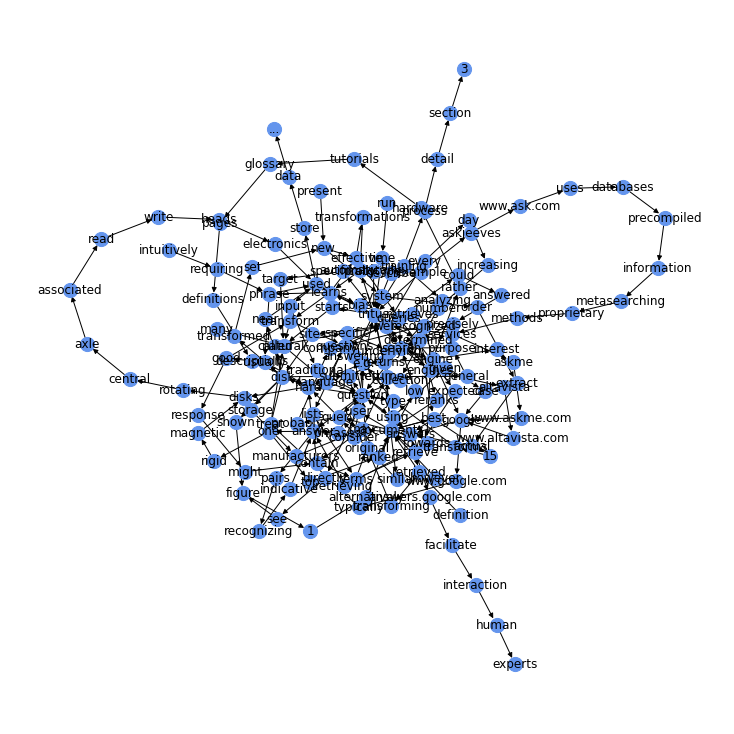

In [5]:
plot_graph(G)

## Keyphrase extracting

ref: https://towardsdatascience.com/keyphrase-extraction-with-graph-centrality-989e142ce427

Key idea: Use the **Centrality Algorithm** provided in NetworkX

 + [Available algorithms](https://networkx.org/documentation/stable/reference/algorithms/centrality.html)

### keywords

In [6]:
import networkx as nx

In [7]:
def get_keywords(scores:dict, n:int = None):
    sorted_scores = sorted(scores.items(), key=lambda item: -item[1])
    if not n:
        n = int(len(node_scores) / 3)
    return [token for token, _ in sorted_scores[:n]]

In [8]:
node_scores = nx.betweenness_centrality(G)

In [9]:
keywords = get_keywords(node_scores, int(len(node_scores)/3))
print(keywords)

['search', 'question', 'tritus', 'hard', 'disk', 'e.g.', 'engine', 'documents', 'web', 'used', 'answers', 'answer', 'submitted', 'returned', 'services', 'google', 'query', 'may', 'disks', 'rotating', 'central', 'axle', 'bias', 'associated', 'questions', 'read', 'write', 'heads', 'electronics', 'queries', 'natural', 'language', 'learns', 'methods', 'proprietary', 'training', 'system', 'rather', 'metasearching', 'hardware', 'best', 'tutorials', 'glossary', 'usually', 'effective', 'pages', 'definitions', 'descriptions', 'engines', 'specific', 'information', 'ranked', 'figure', '1', 'alternatively']


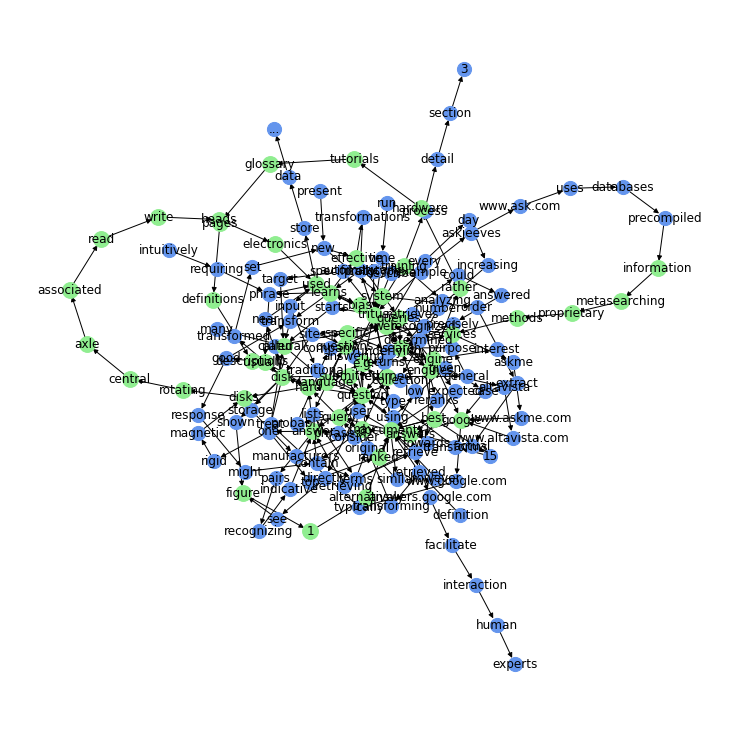

In [10]:
plot_graph(G, highlight=keywords)

### keyword to keyphrase

In [11]:
from graph import preprocess_document

In [12]:
def get_keyphrase(document:list, keywords:list):
    keyphrases = [[]]
    pre_keyword = False
    for sent in document:
        for token in sent:
            if token in keywords:
                keyphrases[-1].append(token)
                pre_keyword = True
            elif pre_keyword:
                last = keyphrases[-1]
                if len(last) > 1:
                    keyphrases[-1] = ' '.join(last)
                    keyphrases.append([])
                else:
                    keyphrases[-1].pop()
                pre_keyword = False
    
    keyphrases = list(set(keyphrases[:-1]))
    for keyword in keywords:
        if any([keyword in phrase for phrase in keyphrases]):
            continue
        keyphrases.append(keyword)
    return keyphrases

In [13]:
doc = preprocess_document(data, stopwords=[], punc='')

In [14]:
phrases = get_keyphrase(doc, keywords)

In [15]:
phrases

['proprietary methods',
 'associated read',
 'hard disk',
 'ranked documents',
 'documents returned',
 'search services',
 'tritus training',
 'natural language question submitted',
 'write heads',
 'best answers may',
 'disks rotating',
 'figure 1',
 'bias search engines',
 'central axle',
 'effective queries',
 'natural language questions',
 'search engines',
 'best documents',
 'hard disks',
 'web search engines',
 'google answers',
 'tritus search',
 'specific web search engine',
 'search engine',
 'glossary pages',
 'rather hardware tutorials',
 'tritus learns',
 'e.g.',
 'used',
 'query',
 'electronics',
 'system',
 'metasearching',
 'usually',
 'definitions',
 'descriptions',
 'information',
 'alternatively']